# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Microsoft Power BI Para Business Intelligence e Data Science</font>

## <font color='blue'>Machine Learning com Linguagem Python e Power BI Dentro do Jupyter Notebook</font>

Problema de Negócio:

Considerando dados históricos de clientes que realizaram compras em nossa empresa, faça o agrupamento (segmentação) dos clientes por similaridade de características em 3 grupos e envie o relatório para a equipe de Marketing.

In [3]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.12


In [1]:
# Imports
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Carregando os Dados

In [6]:
# Carrega os dados
df_dsa = pd.read_csv('dados_clientes.csv')

In [7]:
type(df_dsa)

pandas.core.frame.DataFrame

In [8]:
# Visualiza as 10 primeiras linhas
df_dsa.head(10)

,id,idade,renda_anual,pontuacao_gastos
0,1,56,94740,90
1,2,69,136352,50
2,3,46,86617,62
3,4,32,114841,97
4,5,60,36896,51
5,6,25,145729,37
6,7,38,66175,96
7,8,56,27805,87
8,9,36,25237,78
9,10,40,135247,29


## Análise Exploratória

In [9]:
# Resumo estatístico
df_dsa[['idade', 'renda_anual', 'pontuacao_gastos']].describe()

,idade,renda_anual,pontuacao_gastos
count,500.000000,500.000000,500.000000
mean,44.732000,81557.166000,48.512000
std,15.239707,36764.379945,29.556946
min,18.000000,20384.000000,0.000000
25%,32.000000,49172.750000,24.000000
50%,45.000000,79219.000000,48.500000
75%,57.000000,113017.250000,73.250000
max,70.000000,149695.000000,100.000000


## Pré-Processamento dos Dados

In [10]:
# Cria o padronizador dos dados
padronizador = StandardScaler()

In [11]:
# Aplica o padronizador somente nas colunas de interesse
dados_padronizados = padronizador.fit_transform(df_dsa[['idade', 'renda_anual', 'pontuacao_gastos']])

In [12]:
# Visualiza os dados
print(dados_padronizados)

[[ 0.74012478  0.35893538  1.40506904]
 [ 1.59401387  1.49192537  0.05039391]
 [ 0.08328703  0.13776654  0.45679645]
 ...
 [-0.31081563  0.32661636  0.18586143]
 [-1.23038848 -1.48706069  1.43893592]
 [-1.03333716 -0.96992912 -0.59307677]]


## Construção do Modelo de Machine Learning Para Segmentação de Clientes

In [13]:
# Definimos o número de clusters (k)
k = 3

In [14]:
# Criamos o modelo K-means
kmeans = KMeans(n_clusters = k)

In [15]:
# Treinamento do modelo com os dados padronizados
kmeans.fit(dados_padronizados)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [16]:
# Atribuímos os rótulos dos clusters aos clientes
df_dsa['cluster'] = kmeans.labels_

In [17]:
# Exibe o resultado (10 primeiras linhas)
df_dsa.head(10)

,id,idade,renda_anual,pontuacao_gastos,cluster
0,1,56,94740,90,2
1,2,69,136352,50,2
2,3,46,86617,62,0
3,4,32,114841,97,1
4,5,60,36896,51,0
5,6,25,145729,37,1
6,7,38,66175,96,0
7,8,56,27805,87,0
8,9,36,25237,78,0
9,10,40,135247,29,2


In [19]:
# Salvamos o resultado em disco
df_dsa.to_csv('segmentos.csv', index = False)

## Gerando Relatório dos Segmentos de Clientes com Power BI no Jupyter Notebook

https://pypi.org/project/powerbiclient/

In [20]:
# Instala o pacote
!pip install -q powerbiclient

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.9/684.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.2 MB/s eta 0:00:00


In [21]:
# Carrega as funções usadas para autenticar e gerar  relatórios
from powerbiclient import QuickVisualize, get_dataset_config, Report
from powerbiclient.authentication import DeviceCodeLoginAuthentication

**ATENÇÃO**: Para fazer a autenticação é necessário ter uma conta no Power BI Service, criada com e-mail de estudante ou corporativo. Caso você não tenha, apenas acompanhe as aulas e ao final mostraremos como abrir o relatório no Power BI  Desktop, que será fornecido ao final do capítulo.

In [ ]:
# Define a autenticação no Power BI Service
device_auth = DeviceCodeLoginAuthentication()

In [ ]:
# Cria o relatório no Power BI
relatorio_PBI = QuickVisualize(get_dataset_config(df_dsa), auth = device_auth)

In [ ]:
# Renderiza (visualiza) o relatório
relatorio_PBI

QuickVisualize()

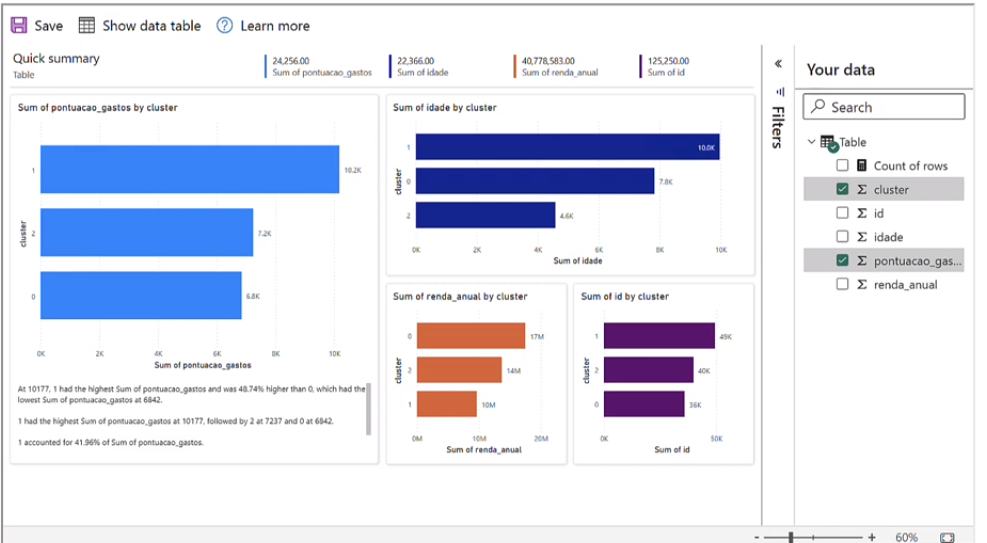

# Fim